Title: My Achey-Breaky Heart<br>
Authors: Ricardo Barbosa, Max Halbert, Lindsey Reynolds, and Dan Sedano <br>

#Project Specifications

### Research Question

What is the percent likelihood of someone dying from cardiovascular disease based on specific high impact risk factors?

### Hypothesis 

Based on initial raw data visualization (specifically a heatmap), we hypothesize that high levels of serum creatinine, age, ejection fraction, and serum sodium will increase the liklihood of cardiovascular disease. 

### Data Set

https://raw.githubusercontent.com/HelpingOtters/CST383_DS_Project/main/heart_failure_clinical_records_dataset.csv

### Description of Data Set
- The source of our dataset is the University of California, Irvine. 
- Our data includes 299 clinical records, including 13 medical features relating to heart disease.
- Our data has no N/A values.
- The dataset documentation noted that the feature of time was not a reliable feature to base our prediction off of.

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

### Features used in our final model

Serum creatinine and ejection fraction

### Machine Learning Model

Classification Decision Tree

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

sns.set(rc={'figure.figsize':(11.7,8.27)})
random_seed = 0

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HelpingOtters/CST383_DS_Project/main/heart_failure_clinical_records_dataset.csv')
# Dropping time feature
df.drop(columns='time', inplace=True)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


There is no missing data and all the values of the dataset are numeric, the dataset is ready to explore and put into the Decision Tree Model. 

---



In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [6]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


Since 'DEATH_EVENT' is the target variable, from the above correlation table, we can see 'age', 'high_blood_pressure', 'serum_creatinine', 'ejection_fraction', and 'serum_sodium' are the top five correlated features. 

#Data Visualization

The following heatmap will show the correlation between features visually.

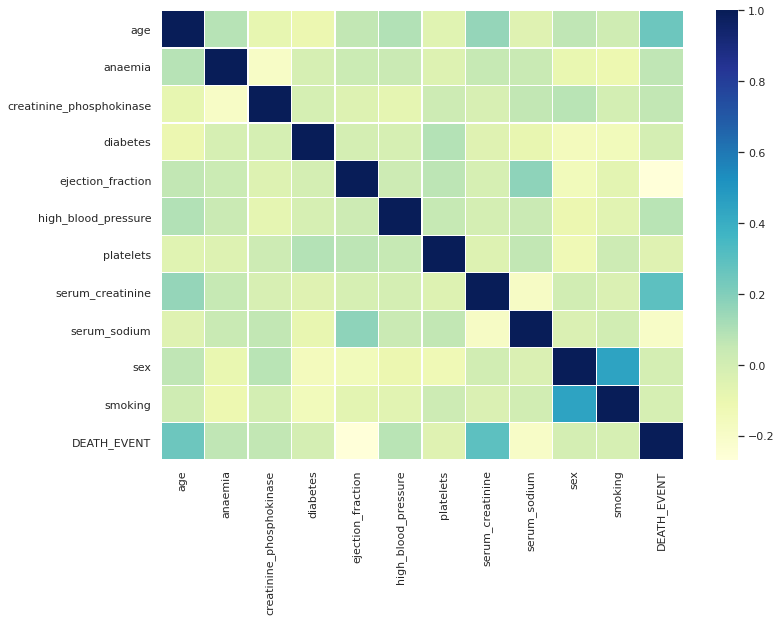

In [7]:
sns.heatmap(df.corr(), linewidths=0.25, cmap='YlGnBu');

From the heatmap, we got the same results from the correlation data table.
Since time has the highest correlation, the relation of time with DEATH_EVENT will be explored.

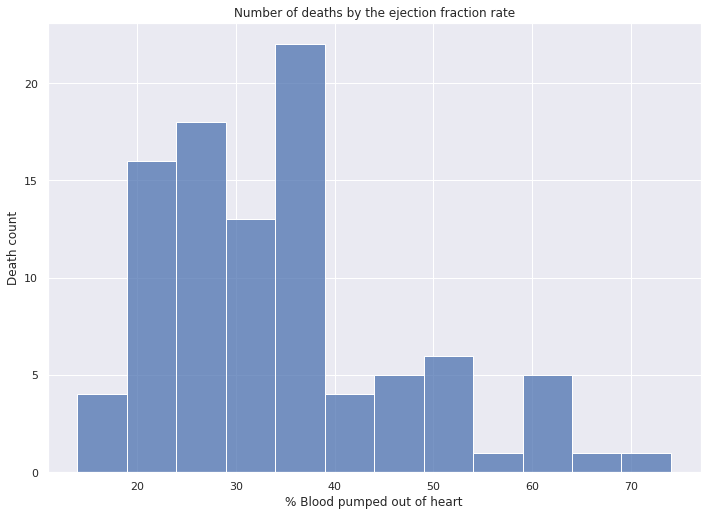

In [8]:
death_events_ejection = df[df['DEATH_EVENT']==1]['ejection_fraction']
sns.histplot(death_events_ejection, binwidth=5)
plt.title('Number of deaths by the ejection fraction rate')
plt.xlabel('% Blood pumped out of heart')
plt.ylabel('Death count');

As we can see, the lower the ejection fraction the higher the death count.

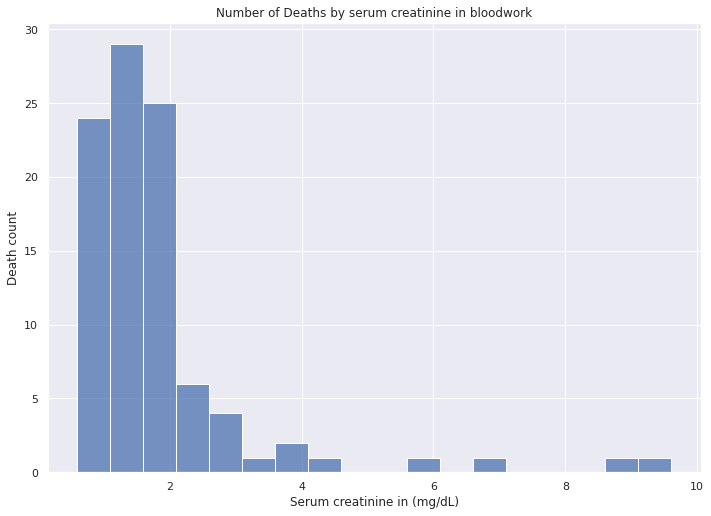

In [9]:
# Explore on the age with death events
death_serum = df[df['DEATH_EVENT']==1]['serum_creatinine']
sns.histplot(death_serum, binwidth=0.5)
plt.title('Number of Deaths by serum creatinine in bloodwork')
plt.xlabel('Serum creatinine in (mg/dL)')
plt.ylabel('Death count');

As we can see lower serum creatinine the higher the death counts.

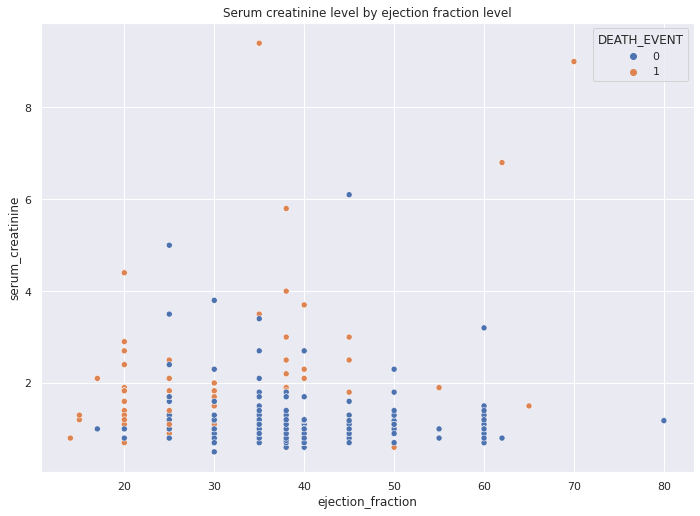

In [10]:
sns.scatterplot(data=df, x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('Serum creatinine level by ejection fraction level');

---
# Machine Learning 

## Model Testing
### Test Case 1:
- 2 most negatively correlated features and 3 most correlated features from the heat map
- max_depth=3, min_samples_split=10

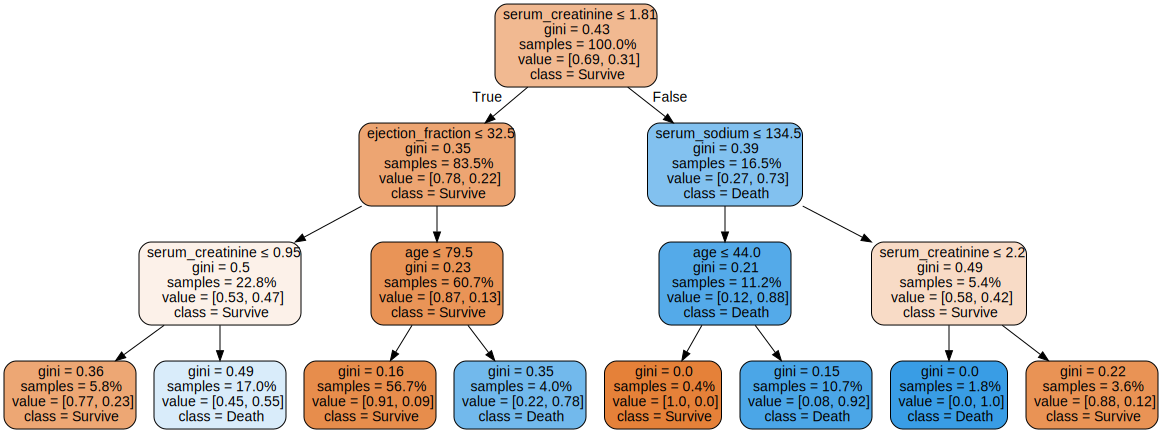

In [11]:
# Convert to Numpy
predictors = ['age', 'high_blood_pressure', 'serum_creatinine', 'ejection_fraction', 'serum_sodium']
X = df[predictors].values
y = (df['DEATH_EVENT']).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# Decision Tree Classification
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=random_seed)
clf.fit(X_train, y_train)

target_names = ['Survive', 'Death']
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)

# plot it
graph = graphviz.Source(dot_data)  
graph

As we can see one of the leaf node samples size is only 0.4% of the data, that is possibility of overfitting. So we will add another hyperparmeter min_samples_leaf to avoid overfitting as we are tuning the model.

#### Which features are most impactful?

In [12]:
# Get a list of all features and their importances
clf.feature_importances_


array([0.22186269, 0.        , 0.50278514, 0.19525679, 0.08009538])

Answer: age, serum_creatinine, ejection_fraction, and serum_sodium appear to have the most impact on results

#### Get Prediction and Accuracy 

In [13]:
def get_cross_tab_graph(actual, prediction, test_number):
  ''' Takes in the actual data, predicted data, and test_number to generate a cross tab table and graph '''
  confusion_matrix = pd.crosstab(actual, prediction, rownames=['Actual'], colnames=['Predicted'])
  # print(confusion_matrix)
  confusion_matrix.plot.bar()
  plt.title(f'CrossTab of Actual vs Predicted {test_number}');

In [14]:
y_predict = clf.predict(X_test)

# accuracy
accuracy = (y_predict == y_test).mean()
print('Test Accuracy: {:.2f}'.format(accuracy))

scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10)
cv_score = scores.mean()
print('Cross Validation Accuracy: {:.2f}'.format(cv_score))

Test Accuracy: 0.73
Cross Validation Accuracy: 0.79


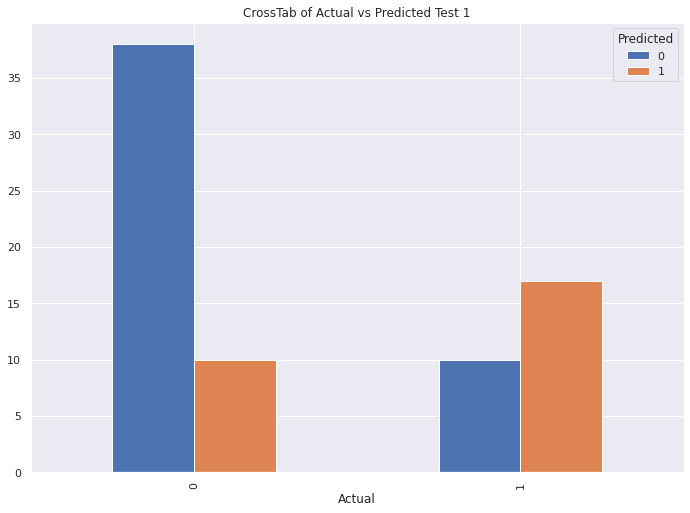

In [15]:
# Confusion Matrix of the result
confusion_matrix(y_test, y_predict)
# Cross Tab Graph Test 1
get_cross_tab_graph(y_test, y_predict, 'Test 1')

### Test Case 2:
- Use a greedy algorithm to find which features give the highest accuracy

In [16]:
# Convert to Numpy
predictors =['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'platelets', 'sex', 'smoking', 'high_blood_pressure', 'serum_creatinine', 'ejection_fraction', 'serum_sodium']
X = df[predictors].values
y = (df['DEATH_EVENT']).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

remaining = list(range(X_train.shape[1]))
selected = []
i_min = 0
n = 8

while len(selected) < n:
    # find the single features that works best in conjunction
    # with the already selected features
    best_acc = 0
    for i in remaining:
        temp_selected = selected.copy()
        temp_selected.append(i)
        X1 = X_train[:, temp_selected]
        # compute the accuracy using 5-fold cross validation
        scores = cross_val_score(DecisionTreeClassifier(max_depth=2), X1, y_train, scoring='accuracy', cv=5)
        if(scores.mean() > best_acc):
          best_acc = scores.mean()
          i_min = i
            
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; Accuracy: {:.2f}'.format(len(selected), best_acc))

print(selected)

num features: 1; Accuracy: 0.75
num features: 2; Accuracy: 0.77
num features: 3; Accuracy: 0.77
num features: 4; Accuracy: 0.77
num features: 5; Accuracy: 0.77
num features: 6; Accuracy: 0.77
num features: 7; Accuracy: 0.77
num features: 8; Accuracy: 0.77
[8, 9, 1, 3, 10, 2, 5, 4]


#### Which features were the best?
Ejection Fraction and Serum Creatinine are the most impactful features.



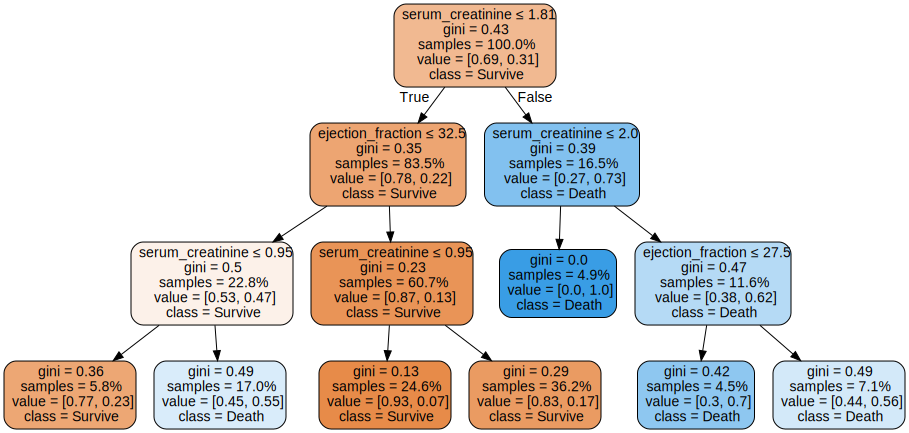

In [17]:
# Convert to Numpy
predictors =['ejection_fraction', 'serum_creatinine']
X = df[predictors].values
y = (df['DEATH_EVENT']).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# Decision Tree Classification
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=random_seed)
clf.fit(X_train, y_train)

target_names = ['Survive', 'Death']
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)

# plot it
graph = graphviz.Source(dot_data)  
graph

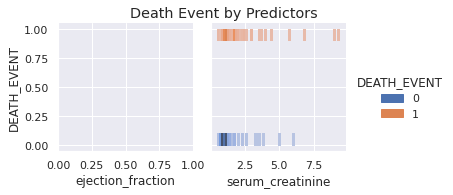

In [18]:
# Hist of DEATH_EVENT by predictors
g = sns.pairplot(df, x_vars=predictors, y_vars=['DEATH_EVENT'], hue='DEATH_EVENT', kind='hist')
g.fig.suptitle('Death Event by Predictors', y=1.05);

#### Get Prediction and Accuracy

In [19]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

# accuracy
accuracy = (y_predict == y_test).mean()
print('Test Accuracy: {:.2f}'.format(accuracy))

scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10)
cv_score = scores.mean()
print('Cross Validation Accuracy: {:.2f}'.format(cv_score))

Test Accuracy: 0.76
Cross Validation Accuracy: 0.77


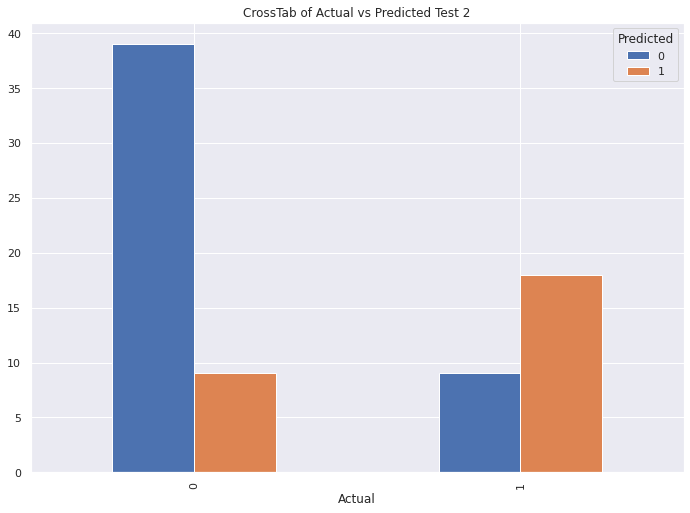

In [20]:
# Cross Tab Graph Test 3
get_cross_tab_graph(y_test, y_predict, 'Test 2')

### Test Case 3:
- Use GridSearch to fine tune hyperparameters
- Use min_samples_split hyperparameter to keep leaf node from having small sample sizes

In [21]:
parameters={'min_samples_split' : range(2, 10) ,'max_depth': range(2, 5)}

clf=DecisionTreeClassifier()
clf_grid = GridSearchCV(clf,parameters)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_


{'max_depth': 2, 'min_samples_split': 2}

Result
- max_depth = 2
- min_samples_split = 2

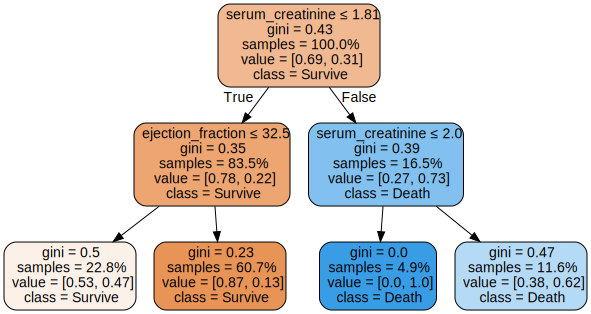

In [22]:
# Use the the best parameters from Grid Search
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=random_seed)
clf.fit(X_train, y_train)

target_names = ['Survive', 'Death']
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)

# plot it
graph = graphviz.Source(dot_data)  
graph

#### Get Prediction and Accuracy

In [23]:
# Get Predictions and Accuracy 
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('Test Set Accuracy', accuracy.round(2))

# Get Cross Validation Score
scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10)
cv_score = scores.mean()
print('Cross Validation Accuracy: {:.2f}'.format(cv_score))

Test Set Accuracy 0.71
Cross Validation Accuracy: 0.76


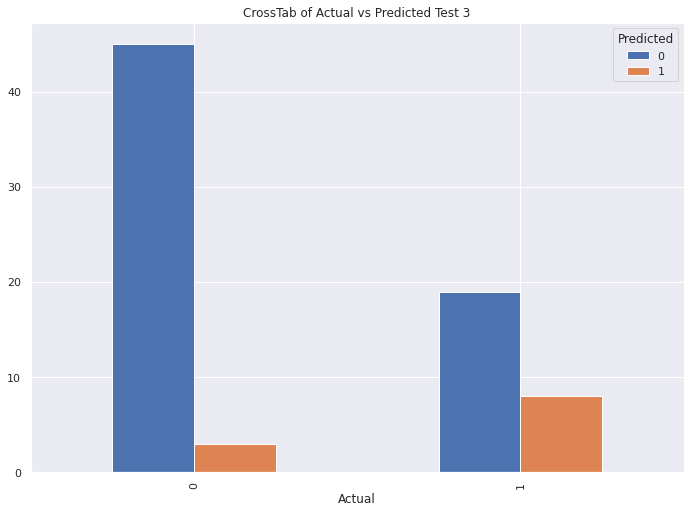

In [24]:
# Cross Tab Graph Test 3
get_cross_tab_graph(y_test, predictions, 'Test 3')

## Final Model (Test Case 2)

In [25]:
# Convert to Numpy
predictors =['ejection_fraction', 'serum_creatinine']
X = df[predictors].values
y = (df['DEATH_EVENT']).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# Decision Tree Classification
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=random_seed)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)

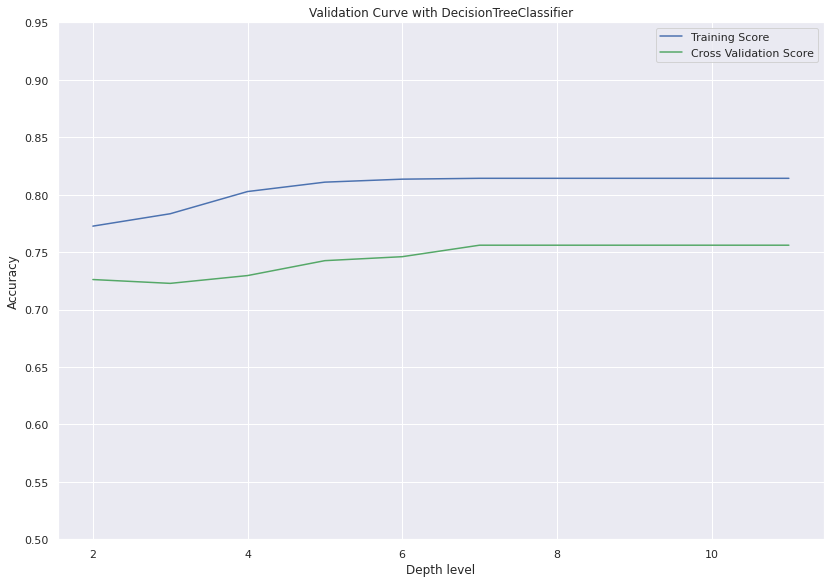

In [26]:
### Validate the final model with max_depth
from sklearn.model_selection import validation_curve
# Setting the range for the paramter (from 1 to 10) 
parameter_range = np.arange(2,12) 
  
# Calculate accuracy on training and test set using the  
# gamma parameter with 10-fold cross validation 
train_score, test_score = validation_curve(DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=20, random_state=random_seed), X, y, 
                                       param_name = "max_depth", 
                                       param_range = parameter_range, 
                                        cv = 10, scoring = "accuracy") 
  
# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with DecisionTreeClassifier") 
plt.yticks(np.arange(0.5,1.0, 0.05))
plt.xlabel("Depth level") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') ;

## Test Cases

In [27]:
def get_percent_death(prediction):
  return prediction[0][1] * 100


### Test Case 1:
- Ejection Fraction: 35
- Serum Creatinine: 0.5 

In [28]:
test1 = [[35, 0.5]]
prediction1 = clf.predict_proba(test1)
percent1 = get_percent_death(prediction1)

print('{:.0f} Percent likehood of dying from heart disease'.format(percent1))

7 Percent likehood of dying from heart disease


### Test Case 2:
- Ejection Fraction: 25
- Serum Creatinine: 2.5

In [29]:
test2 = [[25, 2.5]]
prediction2 = clf.predict_proba(test2)
percent2 = get_percent_death(prediction2)

print('{:.0f} Percent likehood of dying from heart disease'.format(percent2))

70 Percent likehood of dying from heart disease


## Conclusion
### Our Findings
- Serum_creatinine and ejection_fraction were the most impactful features in terms of increasing the accuracy of our model.

### Further Research
- Our model has high variance, which indicates that it may be too flexible  
- We need more data in order to close the gap between the test and training set accuracy 